In [1]:
# for mapper
import kmapper as km
from kmapper.jupyter import display
# for lens function
import sklearn
import sklearn.manifold as manifold
# for calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel(r'NBAHistoricTeamRates.xlsx')

In [3]:
df=pd.DataFrame(data)
df['Team']=df['Rk'].map(str)+df['Team'].map(str)
df

,Rk,Team,3P%,2P%,FT%,Opp 3P%,Opp 2P%,Opp FT%,Pace,DRB%,ORB%,AST%,BLK%,TOV%,3par,Ftr,OppAST%,OppBLK%,OppTOV%,WinScaled
0,2002,2002Atlanta Hawks,0.354,0.458,0.765,0.355,0.485,0.744,91.877373,0.708901,0.274583,0.570838,0.065470,0.147198,0.180635,0.293797,0.605546,0.093981,0.145826,33.000000
1,2003,2003Atlanta Hawks,0.352,0.464,0.793,0.359,0.454,0.760,90.955633,0.704489,0.279118,0.587268,0.083510,0.158854,0.177339,0.312558,0.587396,0.077272,0.124374,35.000000
2,2004,2004Atlanta Hawks,0.335,0.456,0.776,0.358,0.461,0.760,90.831190,0.705204,0.286125,0.582538,0.075626,0.155720,0.191300,0.302650,0.607480,0.078788,0.135084,28.000000
3,2005,2005Atlanta Hawks,0.312,0.463,0.711,0.379,0.500,0.770,91.402891,0.721347,0.307005,0.548606,0.066705,0.150081,0.145833,0.298861,0.592313,0.084927,0.145129,13.000000
4,2006,2006Atlanta Hawks,0.367,0.472,0.750,0.368,0.503,0.745,90.432613,0.694678,0.314042,0.551595,0.075363,0.148220,0.177648,0.339748,0.549268,0.078997,0.146644,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2014,2014Washington Wizards*,0.380,0.485,0.731,0.347,0.498,0.765,93.206005,0.756765,0.251776,0.600881,0.077429,0.136663,0.246243,0.247832,0.600395,0.061350,0.154030,44.000000
623,2015,2015Washington Wizards*,0.360,0.488,0.742,0.349,0.465,0.738,93.680123,0.773330,0.249061,0.627270,0.076225,0.141299,0.203387,0.258910,0.551096,0.064707,0.133721,46.000000
624,2017,2017Washington Wizards*,0.372,0.515,0.784,0.364,0.514,0.751,97.359547,0.754733,0.240582,0.577332,0.070677,0.128771,0.284433,0.253888,0.574854,0.073820,0.142346,49.000000
625,2018,2018Washington Wizards*,0.375,0.508,0.772,0.349,0.522,0.761,96.645791,0.771177,0.234807,0.630534,0.078011,0.133955,0.309632,0.254488,0.573083,0.079051,0.140213,43.000000


In [41]:
"Make an instance of the standard scalar. This is the scalar that converts to z scores"

'Make an instance of the standard scalar. This is the scalar that converts to z scores'

In [4]:
std_scaler = StandardScaler()

Apply that scaler to every column except for Teams (which will error since it is a string).

In [5]:
df[df.columns.difference(["Team"])]=std_scaler.fit_transform(df[df.columns.difference(['Team'])])
teamnames=df[["Team"]].copy()
wins=df[["WinScaled"]].copy()
df=df.drop(columns=["Rk","Team","WinScaled"])
df

,3P%,2P%,FT%,Opp 3P%,Opp 2P%,Opp FT%,Pace,DRB%,ORB%,AST%,BLK%,TOV%,3par,Ftr,OppAST%,OppBLK%,OppTOV%
0,-0.074041,-1.218722,0.148423,-0.091117,-0.239667,-1.096042,-0.521236,-1.247514,0.562328,-0.435029,-1.115394,1.172704,-0.990661,0.188151,0.527667,1.146104,0.715481
1,-0.179910,-1.001287,1.091154,0.179323,-1.408357,-0.008671,-0.753891,-1.407898,0.704623,-0.015563,0.259300,2.240085,-1.030239,0.674857,-0.015953,-0.248962,-1.096382
2,-1.079800,-1.291200,0.518781,0.111713,-1.144459,-0.008671,-0.785301,-1.381913,0.924456,-0.136325,-0.341492,1.953120,-0.862608,0.417805,0.585572,-0.122386,-0.191792
3,-2.297298,-1.037526,-1.669702,1.531520,0.325829,0.670936,-0.640999,-0.795088,1.579604,-1.002581,-1.021214,1.436694,-1.408527,0.319514,0.131299,0.390198,0.656588
4,0.614110,-0.711374,-0.356612,0.787812,0.438928,-1.028082,-0.885905,-1.764554,1.800396,-0.926274,-0.361468,1.266289,-1.026533,1.380213,-1.157938,-0.104957,0.784532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1.302261,-0.240265,-0.996322,-0.631996,0.250429,0.331132,-0.185878,0.492411,-0.153263,0.331971,-0.204098,0.207938,-0.202918,-1.004292,0.373373,-1.578339,1.408356
623,0.243567,-0.131548,-0.625964,-0.496776,-0.993660,-1.503806,-0.066207,1.094575,-0.238452,1.005656,-0.295812,0.632460,-0.717480,-0.716907,-1.103192,-1.298033,-0.306937
624,0.878783,0.846909,0.788133,0.517372,0.853624,-0.620317,0.862510,0.418554,-0.504481,-0.269237,-0.718553,-0.514805,0.255632,-0.847189,-0.391613,-0.537145,0.421516
625,1.037587,0.593235,0.384105,-0.496776,1.155222,0.059289,0.682352,1.016316,-0.685669,1.088997,-0.159717,-0.040078,0.558197,-0.831616,-0.444658,-0.100454,0.241336


In [6]:
data=df.to_numpy()
data

array([[-0.07404101, -1.21872185,  0.14842269, ...,  0.52766734,
         1.14610417,  0.71548053],
       [-0.17991037, -1.00128699,  1.09115376, ..., -0.01595291,
        -0.2489615 , -1.09638206],
       [-1.07979993, -1.29120014,  0.51878132, ...,  0.58557194,
        -0.12238643, -0.19179173],
       ...,
       [ 0.87878323,  0.84690939,  0.78813306, ..., -0.39161317,
        -0.53714509,  0.42151595],
       [ 1.03758727,  0.59323537,  0.38410546, ..., -0.44465808,
        -0.10045396,  0.24133628],
       [-0.23284505,  1.49921399,  0.28309855, ..., -0.60176357,
        -0.18446075, -0.75226421]])

In [10]:
lens

array([[-2.33819868,  1.04856972, -0.30083382, -0.67008172],
       [-2.44174775, -0.12908515, -0.16177443,  0.25393276],
       [-2.78267166,  0.87954152, -0.15441344, -0.27305547],
       ...,
       [ 1.44386325, -0.79002278, -0.67169305, -0.83884613],
       [ 1.91702201, -0.75524683,  0.78624536, -0.5415348 ],
       [ 3.60105525,  0.34187117, -0.92755495,  0.34851095]])

In [7]:
mapper=km.KeplerMapper(verbose=2)

KeplerMapper(verbose=2)


In [8]:
lens = mapper.fit_transform(data, scaler=None,projection=PCA(n_components=4))

..Composing projection pipeline of length 1:
	Projections: PCA(n_components=4)
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (627, 17)

..Projecting data using: 
	PCA(n_components=4)



In [13]:
graph = mapper.map(
    lens,
    data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.2,metric="cosine"),
    cover=km.Cover(n_cubes=4, perc_overlap=0.20),
)

Mapping on data shaped (627, 17) using lens shaped (627, 4)

Minimal points in hypercube before clustering: 5
Creating 256 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

   > Found 0 clusters in hypercube 10.
   > Found 0 clusters in hypercube 11.
   > Found 0 clusters in hypercube 12.
Cube_13 is empty.

   > Found 0 clusters in hypercube 14.
   > Found 0 clusters in hypercube 15.
   > Found 0 clusters in hypercube 16.
   > Found 0 clusters in hypercube 17.
Cube_18 is empty.

Cube_19 is empty.

Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

Cube_23 is empty.

   > Found 0 clusters in hypercube 24.
Cube_25 is empty.

   > Found 0 clusters in hypercube 26.
   > Found 0 clusters in hypercube 27.
   > Found 0 clusters in hypercube 28.
Cube_29 is empty.

   > Found 0 clusters in hypercube 30.
   > Found 1 clusters in hypercube 31.
   > Fo

In [24]:
mapper.visualize(graph, path_html="cat3.html",include_searchbar=True,color_values=wins[:,0],color_function_name='Wins',custom_tooltips=tooltips)

Wrote visualization to: cat3.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [132]:
data

array([[ 2.40446548e-01,  3.95491601e-01,  2.85896200e-01, ...,
        -2.38450475e+00,  3.57936289e-01,  1.67607303e-01],
       [ 9.03465113e-01,  3.95491601e-01,  4.68120175e-01, ...,
        -9.04563084e-01,  1.66943722e+00,  8.30701928e-01],
       [ 3.23323868e-01,  3.95491601e-01,  3.31452194e-01, ...,
        -7.33964480e-01,  1.78968145e-01,  2.50494131e-01],
       ...,
       [ 3.23323868e-01,  3.95491601e-01,  3.99786184e-01, ...,
         1.95968357e+00,  2.04135540e-01,  2.50494131e-01],
       [-2.56817376e-01,  3.95491601e-01,  3.08674197e-01, ...,
        -7.81071224e-01, -3.21583385e-01, -3.29713666e-01],
       [ 7.46919063e-02,  3.95491601e-01,  3.87030506e-01, ...,
         2.79462700e-01,  0.00000000e+00,  1.83364642e-03]])

In [133]:
df

,Wins,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,Opp PTS,Poss,Pace,DRB%,ORB%,AST%,BLK%,TOV%,Pt Diff,Win scaled
0,0.240447,0.395492,0.285896,1.604162,1.318317,0.994233,1.928196,1.770493,0.997433,-0.254380,...,1.679517,0.913588,0.945867,0.927073,-0.849407,0.134060,-0.086781,-2.384505,0.357936,0.167607
1,0.903465,0.395492,0.468120,1.343759,1.147869,0.737708,2.059392,2.144089,0.030105,-0.654419,...,0.666229,0.897607,0.673733,1.074147,-0.515068,0.557305,2.279509,-0.904563,1.669437,0.830702
2,0.323324,0.395492,0.331452,1.782103,1.341350,1.314890,1.403410,1.403599,0.298807,0.451306,...,1.646679,1.191504,1.289174,0.292231,-0.564656,0.357482,1.640249,-0.733964,0.178968,0.250494
3,0.240447,0.395492,0.445342,2.068546,1.907974,0.865970,2.321785,2.288167,0.513769,-0.164484,...,2.001642,1.474888,1.542624,0.183760,-0.742795,1.770136,1.174426,-1.605963,0.100670,0.167607
4,0.489079,0.395492,0.308674,1.695303,1.055736,1.635546,1.095776,1.004873,0.728731,0.667057,...,1.631042,1.045813,1.107888,1.461934,-1.671573,-0.406886,-0.483707,-1.473629,-0.089484,0.416268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.406201,0.395492,0.399786,0.432350,0.028443,0.930102,-0.636923,-0.791068,1.212395,1.080580,...,-0.586306,-0.483852,-1.244185,-2.261373,1.177139,0.706022,-0.812943,-0.162159,0.693502,0.333381
644,0.157569,0.395492,0.331452,-0.487739,0.134397,-1.314494,-1.098373,-1.097651,-0.346079,0.586150,...,-0.955343,-0.590302,-1.313948,-1.532899,1.807953,0.558780,0.427899,0.214307,-0.100670,0.084720
645,0.323324,0.395492,0.399786,-0.704741,-0.678684,-0.288393,-1.582443,-1.544961,-1.205927,0.842355,...,-0.536267,-0.272384,-0.936410,-0.957330,2.470535,2.820484,1.887716,1.959684,0.204136,0.250494
646,-0.256817,0.395492,0.308674,-0.405278,-0.010713,-0.865575,-1.469343,-1.638779,1.749800,1.040126,...,-0.651982,-0.683664,-1.421984,-1.079585,1.608212,-0.107657,-1.070262,-0.781071,-0.321583,-0.329714


In [25]:
teamnames=teamnames.transpose()

In [26]:
worker = teamnames.to_numpy()

In [12]:
tooltips

array([['2002Atlanta Hawks', '2003Atlanta Hawks', '2004Atlanta Hawks',
        '2005Atlanta Hawks', '2006Atlanta Hawks', '2007Atlanta Hawks',
        '2018Atlanta Hawks', '2019Atlanta Hawks', '2020Atlanta Hawks',
        '2008Atlanta Hawks*', '2009Atlanta Hawks*', '2010Atlanta Hawks*',
        '2011Atlanta Hawks*', '2012Atlanta Hawks*', '2013Atlanta Hawks*',
        '2014Atlanta Hawks*', '2015Atlanta Hawks*', '2016Atlanta Hawks*',
        '2017Atlanta Hawks*', '2021Atlanta Hawks*', '2022Atlanta Hawks*',
        '2006Boston Celtics', '2007Boston Celtics', '2014Boston Celtics',
        '2002Boston Celtics*', '2003Boston Celtics*',
        '2004Boston Celtics*', '2005Boston Celtics*',
        '2008Boston Celtics*', '2009Boston Celtics*',
        '2010Boston Celtics*', '2011Boston Celtics*',
        '2012Boston Celtics*', '2013Boston Celtics*',
        '2015Boston Celtics*', '2016Boston Celtics*',
        '2017Boston Celtics*', '2018Boston Celtics*',
        '2019Boston Celtics*', '2020Bos

In [11]:
tooltips = np.array(['2002Atlanta Hawks', '2003Atlanta Hawks', '2004Atlanta Hawks',
        '2005Atlanta Hawks', '2006Atlanta Hawks', '2007Atlanta Hawks',
        '2018Atlanta Hawks', '2019Atlanta Hawks', '2020Atlanta Hawks',
        '2008Atlanta Hawks*', '2009Atlanta Hawks*', '2010Atlanta Hawks*',
        '2011Atlanta Hawks*', '2012Atlanta Hawks*', '2013Atlanta Hawks*',
        '2014Atlanta Hawks*', '2015Atlanta Hawks*', '2016Atlanta Hawks*',
        '2017Atlanta Hawks*', '2021Atlanta Hawks*', '2022Atlanta Hawks*',
        '2006Boston Celtics', '2007Boston Celtics', '2014Boston Celtics',
        '2002Boston Celtics*', '2003Boston Celtics*',
        '2004Boston Celtics*', '2005Boston Celtics*',
        '2008Boston Celtics*', '2009Boston Celtics*',
        '2010Boston Celtics*', '2011Boston Celtics*',
        '2012Boston Celtics*', '2013Boston Celtics*',
        '2015Boston Celtics*', '2016Boston Celtics*',
        '2017Boston Celtics*', '2018Boston Celtics*',
        '2019Boston Celtics*', '2020Boston Celtics*',
        '2021Boston Celtics*', '2022Boston Celtics*',
        '2016Brooklyn Nets', '2017Brooklyn Nets', '2018Brooklyn Nets',
        '2013Brooklyn Nets*', '2014Brooklyn Nets*', '2015Brooklyn Nets*',
        '2019Brooklyn Nets*', '2020Brooklyn Nets*', '2021Brooklyn Nets*',
        '2022Brooklyn Nets*', '2005Charlotte Bobcats',
        '2006Charlotte Bobcats', '2007Charlotte Bobcats',
        '2008Charlotte Bobcats', '2009Charlotte Bobcats',
        '2011Charlotte Bobcats', '2012Charlotte Bobcats',
        '2013Charlotte Bobcats', '2010Charlotte Bobcats*',
        '2014Charlotte Bobcats*', '2015Charlotte Hornets',
        '2017Charlotte Hornets', '2018Charlotte Hornets',
        '2019Charlotte Hornets', '2020Charlotte Hornets',
        '2021Charlotte Hornets', '2022Charlotte Hornets',
        '2002Charlotte Hornets*', '2016Charlotte Hornets*',
        '2002Chicago Bulls', '2003Chicago Bulls', '2004Chicago Bulls',
        '2008Chicago Bulls', '2016Chicago Bulls', '2018Chicago Bulls',
        '2019Chicago Bulls', '2020Chicago Bulls', '2021Chicago Bulls',
        '2005Chicago Bulls*', '2006Chicago Bulls*', '2007Chicago Bulls*',
        '2009Chicago Bulls*', '2010Chicago Bulls*', '2011Chicago Bulls*',
        '2012Chicago Bulls*', '2013Chicago Bulls*', '2014Chicago Bulls*',
        '2015Chicago Bulls*', '2017Chicago Bulls*', '2022Chicago Bulls*',
        '2002Cleveland Cavaliers', '2003Cleveland Cavaliers',
        '2004Cleveland Cavaliers', '2005Cleveland Cavaliers',
        '2011Cleveland Cavaliers', '2012Cleveland Cavaliers',
        '2013Cleveland Cavaliers', '2014Cleveland Cavaliers',
        '2019Cleveland Cavaliers', '2020Cleveland Cavaliers',
        '2021Cleveland Cavaliers', '2022Cleveland Cavaliers',
        '2006Cleveland Cavaliers*', '2007Cleveland Cavaliers*',
        '2008Cleveland Cavaliers*', '2009Cleveland Cavaliers*',
        '2010Cleveland Cavaliers*', '2015Cleveland Cavaliers*',
        '2016Cleveland Cavaliers*', '2017Cleveland Cavaliers*',
        '2018Cleveland Cavaliers*', '2013Dallas Mavericks',
        '2017Dallas Mavericks', '2018Dallas Mavericks',
        '2019Dallas Mavericks', '2002Dallas Mavericks*',
        '2003Dallas Mavericks*', '2004Dallas Mavericks*',
        '2005Dallas Mavericks*', '2006Dallas Mavericks*',
        '2007Dallas Mavericks*', '2008Dallas Mavericks*',
        '2009Dallas Mavericks*', '2010Dallas Mavericks*',
        '2011Dallas Mavericks*', '2012Dallas Mavericks*',
        '2014Dallas Mavericks*', '2015Dallas Mavericks*',
        '2016Dallas Mavericks*', '2020Dallas Mavericks*',
        '2021Dallas Mavericks*', '2022Dallas Mavericks*',
        '2002Denver Nuggets', '2003Denver Nuggets', '2014Denver Nuggets',
        '2015Denver Nuggets', '2016Denver Nuggets', '2017Denver Nuggets',
        '2018Denver Nuggets', '2004Denver Nuggets*',
        '2005Denver Nuggets*', '2006Denver Nuggets*',
        '2007Denver Nuggets*', '2008Denver Nuggets*',
        '2009Denver Nuggets*', '2010Denver Nuggets*',
        '2011Denver Nuggets*', '2012Denver Nuggets*',
        '2013Denver Nuggets*', '2019Denver Nuggets*',
        '2020Denver Nuggets*', '2021Denver Nuggets*',
        '2022Denver Nuggets*', '2010Detroit Pistons',
        '2011Detroit Pistons', '2012Detroit Pistons',
        '2013Detroit Pistons', '2014Detroit Pistons',
        '2015Detroit Pistons', '2017Detroit Pistons',
        '2018Detroit Pistons', '2020Detroit Pistons',
        '2021Detroit Pistons', '2022Detroit Pistons',
        '2002Detroit Pistons*', '2003Detroit Pistons*',
        '2004Detroit Pistons*', '2005Detroit Pistons*',
        '2006Detroit Pistons*', '2007Detroit Pistons*',
        '2008Detroit Pistons*', '2009Detroit Pistons*',
        '2016Detroit Pistons*', '2019Detroit Pistons*',
        '2002Golden State Warriors', '2003Golden State Warriors',
        '2004Golden State Warriors', '2005Golden State Warriors',
        '2006Golden State Warriors', '2008Golden State Warriors',
        '2009Golden State Warriors', '2010Golden State Warriors',
        '2011Golden State Warriors', '2012Golden State Warriors',
        '2020Golden State Warriors', '2021Golden State Warriors',
        '2007Golden State Warriors*', '2013Golden State Warriors*',
        '2014Golden State Warriors*', '2015Golden State Warriors*',
        '2016Golden State Warriors*', '2017Golden State Warriors*',
        '2018Golden State Warriors*', '2019Golden State Warriors*',
        '2022Golden State Warriors*', '2002Houston Rockets',
        '2003Houston Rockets', '2006Houston Rockets',
        '2010Houston Rockets', '2011Houston Rockets',
        '2012Houston Rockets', '2021Houston Rockets',
        '2022Houston Rockets', '2004Houston Rockets*',
        '2005Houston Rockets*', '2007Houston Rockets*',
        '2008Houston Rockets*', '2009Houston Rockets*',
        '2013Houston Rockets*', '2014Houston Rockets*',
        '2015Houston Rockets*', '2016Houston Rockets*',
        '2017Houston Rockets*', '2018Houston Rockets*',
        '2019Houston Rockets*', '2020Houston Rockets*',
        '2007Indiana Pacers', '2008Indiana Pacers', '2009Indiana Pacers',
        '2010Indiana Pacers', '2015Indiana Pacers', '2021Indiana Pacers',
        '2022Indiana Pacers', '2002Indiana Pacers*',
        '2003Indiana Pacers*', '2004Indiana Pacers*',
        '2005Indiana Pacers*', '2006Indiana Pacers*',
        '2011Indiana Pacers*', '2012Indiana Pacers*',
        '2013Indiana Pacers*', '2014Indiana Pacers*',
        '2016Indiana Pacers*', '2017Indiana Pacers*',
        '2018Indiana Pacers*', '2019Indiana Pacers*',
        '2020Indiana Pacers*', '2002Los Angeles Clippers',
        '2003Los Angeles Clippers', '2004Los Angeles Clippers',
        '2005Los Angeles Clippers', '2007Los Angeles Clippers',
        '2008Los Angeles Clippers', '2009Los Angeles Clippers',
        '2010Los Angeles Clippers', '2011Los Angeles Clippers',
        '2018Los Angeles Clippers', '2022Los Angeles Clippers',
        '2006Los Angeles Clippers*', '2012Los Angeles Clippers*',
        '2013Los Angeles Clippers*', '2014Los Angeles Clippers*',
        '2015Los Angeles Clippers*', '2016Los Angeles Clippers*',
        '2017Los Angeles Clippers*', '2019Los Angeles Clippers*',
        '2020Los Angeles Clippers*', '2021Los Angeles Clippers*',
        '2005Los Angeles Lakers', '2014Los Angeles Lakers',
        '2015Los Angeles Lakers', '2016Los Angeles Lakers',
        '2017Los Angeles Lakers', '2018Los Angeles Lakers',
        '2019Los Angeles Lakers', '2022Los Angeles Lakers',
        '2002Los Angeles Lakers*', '2003Los Angeles Lakers*',
        '2004Los Angeles Lakers*', '2006Los Angeles Lakers*',
        '2007Los Angeles Lakers*', '2008Los Angeles Lakers*',
        '2009Los Angeles Lakers*', '2010Los Angeles Lakers*',
        '2011Los Angeles Lakers*', '2012Los Angeles Lakers*',
        '2013Los Angeles Lakers*', '2020Los Angeles Lakers*',
        '2021Los Angeles Lakers*', '2002Memphis Grizzlies',
        '2003Memphis Grizzlies', '2007Memphis Grizzlies',
        '2008Memphis Grizzlies', '2009Memphis Grizzlies',
        '2010Memphis Grizzlies', '2018Memphis Grizzlies',
        '2019Memphis Grizzlies', '2020Memphis Grizzlies',
        '2004Memphis Grizzlies*', '2005Memphis Grizzlies*',
        '2006Memphis Grizzlies*', '2011Memphis Grizzlies*',
        '2012Memphis Grizzlies*', '2013Memphis Grizzlies*',
        '2014Memphis Grizzlies*', '2015Memphis Grizzlies*',
        '2016Memphis Grizzlies*', '2017Memphis Grizzlies*',
        '2021Memphis Grizzlies*', '2022Memphis Grizzlies*',
        '2002Miami Heat', '2003Miami Heat', '2008Miami Heat',
        '2015Miami Heat', '2017Miami Heat', '2019Miami Heat',
        '2004Miami Heat*', '2005Miami Heat*', '2006Miami Heat*',
        '2007Miami Heat*', '2009Miami Heat*', '2010Miami Heat*',
        '2011Miami Heat*', '2012Miami Heat*', '2013Miami Heat*',
        '2014Miami Heat*', '2016Miami Heat*', '2018Miami Heat*',
        '2020Miami Heat*', '2021Miami Heat*', '2022Miami Heat*',
        '2002Milwaukee Bucks', '2005Milwaukee Bucks',
        '2007Milwaukee Bucks', '2008Milwaukee Bucks',
        '2009Milwaukee Bucks', '2011Milwaukee Bucks',
        '2012Milwaukee Bucks', '2014Milwaukee Bucks',
        '2016Milwaukee Bucks', '2003Milwaukee Bucks*',
        '2004Milwaukee Bucks*', '2006Milwaukee Bucks*',
        '2010Milwaukee Bucks*', '2013Milwaukee Bucks*',
        '2015Milwaukee Bucks*', '2017Milwaukee Bucks*',
        '2018Milwaukee Bucks*', '2019Milwaukee Bucks*',
        '2020Milwaukee Bucks*', '2021Milwaukee Bucks*',
        '2022Milwaukee Bucks*', '2005Minnesota Timberwolves',
        '2006Minnesota Timberwolves', '2007Minnesota Timberwolves',
        '2008Minnesota Timberwolves', '2009Minnesota Timberwolves',
        '2010Minnesota Timberwolves', '2011Minnesota Timberwolves',
        '2012Minnesota Timberwolves', '2013Minnesota Timberwolves',
        '2014Minnesota Timberwolves', '2015Minnesota Timberwolves',
        '2016Minnesota Timberwolves', '2017Minnesota Timberwolves',
        '2019Minnesota Timberwolves', '2020Minnesota Timberwolves',
        '2021Minnesota Timberwolves', '2002Minnesota Timberwolves*',
        '2003Minnesota Timberwolves*', '2004Minnesota Timberwolves*',
        '2018Minnesota Timberwolves*', '2022Minnesota Timberwolves*',
        '2008New Jersey Nets', '2009New Jersey Nets',
        '2010New Jersey Nets', '2011New Jersey Nets',
        '2012New Jersey Nets', '2002New Jersey Nets*',
        '2003New Jersey Nets*', '2004New Jersey Nets*',
        '2005New Jersey Nets*', '2006New Jersey Nets*',
        '2007New Jersey Nets*', '2005New Orleans Hornets',
        '2010New Orleans Hornets', '2012New Orleans Hornets',
        '2013New Orleans Hornets', '2003New Orleans Hornets*',
        '2004New Orleans Hornets*', '2008New Orleans Hornets*',
        '2009New Orleans Hornets*', '2011New Orleans Hornets*',
        '2014New Orleans Pelicans', '2016New Orleans Pelicans',
        '2017New Orleans Pelicans', '2019New Orleans Pelicans',
        '2020New Orleans Pelicans', '2021New Orleans Pelicans',
        '2015New Orleans Pelicans*', '2018New Orleans Pelicans*',
        '2022New Orleans Pelicans*',
        '2006New Orleans/Oklahoma City Hornets',
        '2007New Orleans/Oklahoma City Hornets', '2002New York Knicks',
        '2003New York Knicks', '2005New York Knicks',
        '2006New York Knicks', '2007New York Knicks',
        '2008New York Knicks', '2009New York Knicks',
        '2010New York Knicks', '2014New York Knicks',
        '2015New York Knicks', '2016New York Knicks',
        '2017New York Knicks', '2018New York Knicks',
        '2019New York Knicks', '2020New York Knicks',
        '2022New York Knicks', '2004New York Knicks*',
        '2011New York Knicks*', '2012New York Knicks*',
        '2013New York Knicks*', '2021New York Knicks*',
        '2009Oklahoma City Thunder', '2015Oklahoma City Thunder',
        '2021Oklahoma City Thunder', '2022Oklahoma City Thunder',
        '2010Oklahoma City Thunder*', '2011Oklahoma City Thunder*',
        '2012Oklahoma City Thunder*', '2013Oklahoma City Thunder*',
        '2014Oklahoma City Thunder*', '2016Oklahoma City Thunder*',
        '2017Oklahoma City Thunder*', '2018Oklahoma City Thunder*',
        '2019Oklahoma City Thunder*', '2020Oklahoma City Thunder*',
        '2004Orlando Magic', '2005Orlando Magic', '2006Orlando Magic',
        '2013Orlando Magic', '2014Orlando Magic', '2015Orlando Magic',
        '2016Orlando Magic', '2017Orlando Magic', '2018Orlando Magic',
        '2021Orlando Magic', '2022Orlando Magic', '2002Orlando Magic*',
        '2003Orlando Magic*', '2007Orlando Magic*', '2008Orlando Magic*',
        '2009Orlando Magic*', '2010Orlando Magic*', '2011Orlando Magic*',
        '2012Orlando Magic*', '2019Orlando Magic*', '2020Orlando Magic*',
        '2004Philadelphia 76ers', '2006Philadelphia 76ers',
        '2007Philadelphia 76ers', '2010Philadelphia 76ers',
        '2013Philadelphia 76ers', '2014Philadelphia 76ers',
        '2015Philadelphia 76ers', '2016Philadelphia 76ers',
        '2017Philadelphia 76ers', '2002Philadelphia 76ers*',
        '2003Philadelphia 76ers*', '2005Philadelphia 76ers*',
        '2008Philadelphia 76ers*', '2009Philadelphia 76ers*',
        '2011Philadelphia 76ers*', '2012Philadelphia 76ers*',
        '2018Philadelphia 76ers*', '2019Philadelphia 76ers*',
        '2020Philadelphia 76ers*', '2021Philadelphia 76ers*',
        '2022Philadelphia 76ers*', '2002Phoenix Suns',
        '2004Phoenix Suns', '2009Phoenix Suns', '2011Phoenix Suns',
        '2012Phoenix Suns', '2013Phoenix Suns', '2014Phoenix Suns',
        '2015Phoenix Suns', '2016Phoenix Suns', '2017Phoenix Suns',
        '2018Phoenix Suns', '2019Phoenix Suns', '2020Phoenix Suns',
        '2003Phoenix Suns*', '2005Phoenix Suns*', '2006Phoenix Suns*',
        '2007Phoenix Suns*', '2008Phoenix Suns*', '2010Phoenix Suns*',
        '2021Phoenix Suns*', '2022Phoenix Suns*',
        '2004Portland Trail Blazers', '2005Portland Trail Blazers',
        '2006Portland Trail Blazers', '2007Portland Trail Blazers',
        '2008Portland Trail Blazers', '2012Portland Trail Blazers',
        '2013Portland Trail Blazers', '2022Portland Trail Blazers',
        '2002Portland Trail Blazers*', '2003Portland Trail Blazers*',
        '2009Portland Trail Blazers*', '2010Portland Trail Blazers*',
        '2011Portland Trail Blazers*', '2014Portland Trail Blazers*',
        '2015Portland Trail Blazers*', '2016Portland Trail Blazers*',
        '2017Portland Trail Blazers*', '2018Portland Trail Blazers*',
        '2019Portland Trail Blazers*', '2020Portland Trail Blazers*',
        '2021Portland Trail Blazers*', '2007Sacramento Kings',
        '2008Sacramento Kings', '2009Sacramento Kings',
        '2010Sacramento Kings', '2011Sacramento Kings',
        '2012Sacramento Kings', '2013Sacramento Kings',
        '2014Sacramento Kings', '2015Sacramento Kings',
        '2016Sacramento Kings', '2017Sacramento Kings',
        '2018Sacramento Kings', '2019Sacramento Kings',
        '2020Sacramento Kings', '2021Sacramento Kings',
        '2022Sacramento Kings', '2002Sacramento Kings*',
        '2003Sacramento Kings*', '2004Sacramento Kings*',
        '2005Sacramento Kings*', '2006Sacramento Kings*',
        '2020San Antonio Spurs', '2021San Antonio Spurs',
        '2022San Antonio Spurs', '2002San Antonio Spurs*',
        '2003San Antonio Spurs*', '2004San Antonio Spurs*',
        '2005San Antonio Spurs*', '2006San Antonio Spurs*',
        '2007San Antonio Spurs*', '2008San Antonio Spurs*',
        '2009San Antonio Spurs*', '2010San Antonio Spurs*',
        '2011San Antonio Spurs*', '2012San Antonio Spurs*',
        '2013San Antonio Spurs*', '2014San Antonio Spurs*',
        '2015San Antonio Spurs*', '2016San Antonio Spurs*',
        '2017San Antonio Spurs*', '2018San Antonio Spurs*',
        '2019San Antonio Spurs*', '2003Seattle SuperSonics',
        '2004Seattle SuperSonics', '2006Seattle SuperSonics',
        '2007Seattle SuperSonics', '2008Seattle SuperSonics',
        '2002Seattle SuperSonics*', '2005Seattle SuperSonics*',
        '2003Toronto Raptors', '2004Toronto Raptors',
        '2005Toronto Raptors', '2006Toronto Raptors',
        '2009Toronto Raptors', '2010Toronto Raptors',
        '2011Toronto Raptors', '2012Toronto Raptors',
        '2013Toronto Raptors', '2021Toronto Raptors',
        '2002Toronto Raptors*', '2007Toronto Raptors*',
        '2008Toronto Raptors*', '2014Toronto Raptors*',
        '2015Toronto Raptors*', '2016Toronto Raptors*',
        '2017Toronto Raptors*', '2018Toronto Raptors*',
        '2019Toronto Raptors*', '2020Toronto Raptors*',
        '2022Toronto Raptors*', '2004Utah Jazz', '2005Utah Jazz',
        '2006Utah Jazz', '2011Utah Jazz', '2013Utah Jazz',
        '2014Utah Jazz', '2015Utah Jazz', '2016Utah Jazz',
        '2002Utah Jazz*', '2003Utah Jazz*', '2007Utah Jazz*',
        '2008Utah Jazz*', '2009Utah Jazz*', '2010Utah Jazz*',
        '2012Utah Jazz*', '2017Utah Jazz*', '2018Utah Jazz*',
        '2019Utah Jazz*', '2020Utah Jazz*', '2021Utah Jazz*',
        '2022Utah Jazz*', '2002Washington Wizards',
        '2003Washington Wizards', '2004Washington Wizards',
        '2009Washington Wizards', '2010Washington Wizards',
        '2011Washington Wizards', '2012Washington Wizards',
        '2013Washington Wizards', '2016Washington Wizards',
        '2019Washington Wizards', '2020Washington Wizards',
        '2022Washington Wizards', '2005Washington Wizards*',
        '2006Washington Wizards*', '2007Washington Wizards*',
        '2008Washington Wizards*', '2014Washington Wizards*',
        '2015Washington Wizards*', '2017Washington Wizards*',
        '2018Washington Wizards*', '2021Washington Wizards*'],
      dtype=object)

In [15]:
wins=wins.to_numpy()

In [13]:
wins[:,0]

array([-0.64908415, -0.48595513, -1.05690669, -2.28037433, -1.22003571,
       -0.89377767, -1.38316473, -0.97534218, -1.34420855, -0.32282611,
        0.49281898,  0.98220604,  0.24812546,  0.71279599,  0.24812546,
       -0.2412616 ,  1.5531576 ,  0.57438349,  0.16656095,  0.46789649,
        0.16656095, -0.64908415, -1.38316473, -1.30160022,  0.655948  ,
        0.24812546, -0.40439062,  0.32968996,  2.04254466,  1.71628662,
        0.73751251,  1.22689957,  0.61145827,  0.04471767, -0.07813258,
        0.57438349,  0.98220604,  1.14533506,  0.655948  ,  1.11814689,
        0.00343193,  0.81907702, -1.62785826, -1.70942277, -1.05690669,
        0.655948  ,  0.24812546, -0.2412616 ,  0.08499644, -0.08946099,
        1.11814689,  0.24812546, -1.87255179, -1.22003571, -0.64908415,
       -0.73064866, -0.48595513, -0.56751964, -2.63134889, -1.62785826,
        0.24812546,  0.16656095, -0.64908415, -0.40439062, -0.40439062,
       -0.15969709, -0.97408735, -0.27524681,  0.16656095,  0.24

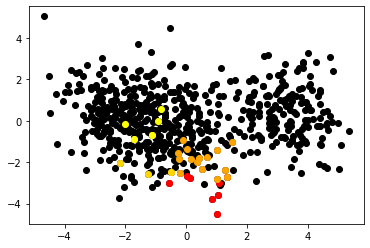

In [17]:
plt.scatter(lens[:,0],lens[:,1],c='black')
plt.scatter(lens[487,0],lens[487,1],c='red')
plt.scatter(lens[489,0],lens[489,1],c='red')
plt.scatter(lens[491,0],lens[491,1],c='red')
plt.scatter(lens[125,0],lens[125,1],c='red')
plt.scatter(lens[551,0],lens[551,1],c='red')
plt.scatter(lens[490,0],lens[490,1],c='red')
plt.scatter(lens[488,0],lens[488,1],c='red')
plt.scatter(lens[191,0],lens[191,1],c='red')
for i in Grouptwo:
    plt.scatter(lens[i,0],lens[i,1],c='orange')
for i in Groupthree:
    plt.scatter(lens[i,0],lens[i,1],c='gold')
for i in Groupfour:
    plt.scatter(lens[i,0],lens[i,1],c='yellow')

In [26]:
Groupone=[487,489,461,125,551,490,488,191]

In [27]:
worker[:,135]

array(['2003Denver Nuggets'], dtype=object)

In [28]:
lens[135]

array([-4.67209609,  5.04132585])

In [35]:
list(tooltips).index('2005Phoenix Suns*')

487

In [36]:
lens[487]

array([-0.56594674, -3.02643434])

In [37]:
list(tooltips).index('2007Phoenix Suns*')

489

In [38]:
list(tooltips).index('2010Phoenix Suns*')

491

In [39]:
list(tooltips).index('2010Dallas Mavericks*')

125

In [40]:
list(tooltips).index('2014San Antonio Spurs*')

551

In [41]:
lens[491]

array([ 0.03361873, -2.68657989])

In [42]:
lens[125]

array([ 0.13124759, -2.7785807 ])

In [43]:
lens[551]

array([ 1.34301644, -2.69153331])

In [44]:
lens[489]

array([ 1.0472522 , -3.58719377])

In [49]:
list(tooltips).index('2006Phoenix Suns*')

488

In [50]:
list(tooltips).index('2008Phoenix Suns*')

490

In [51]:
list(tooltips).index('2015Golden State Warriors*')

191

In [14]:
Grouptwo=[list(tooltips).index('2010Cleveland Cavaliers*'),
list(tooltips).index('2014Golden State Warriors*'),
list(tooltips).index('2015Indiana Pacers'),
list(tooltips).index('2017Miami Heat'),
list(tooltips).index('2008Orlando Magic*'),
list(tooltips).index('2009Orlando Magic*'),
list(tooltips).index('2010Orlando Magic*'),
list(tooltips).index('2008San Antonio Spurs*'),
list(tooltips).index('2009San Antonio Spurs*'),
list(tooltips).index('2010San Antonio Spurs*'),
list(tooltips).index('2011San Antonio Spurs*'),
list(tooltips).index('2012San Antonio Spurs*'),
list(tooltips).index('2013San Antonio Spurs*'),
list(tooltips).index('2014San Antonio Spurs*'),
list(tooltips).index('2015San Antonio Spurs*'),
list(tooltips).index('2017Utah Jazz*')]

In [15]:
Groupthree=[list(tooltips).index('2005Miami Heat*'),
list(tooltips).index('2006Miami Heat*'),
list(tooltips).index('2011Miami Heat*'),
list(tooltips).index('2009Orlando Magic*'),
list(tooltips).index('2011Orlando Magic*')]

In [16]:
Groupfour=[list(tooltips).index('2013Los Angeles Lakers*'),
           list(tooltips).index('2006Miami Heat*'),
           list(tooltips).index('2007Miami Heat*'),
           list(tooltips).index('2011Orlando Magic*'),
           list(tooltips).index('2012Orlando Magic*')]

In [73]:
projection

NameError: name 'projection' is not defined

In [74]:
projection=PCA(n_components=2)
projection.fit(data)

PCA(n_components=2)

In [76]:
projection.components_

array([[ 0.12262798,  0.33459947,  0.15162245,  0.05747756,  0.31346389,
         0.22870916,  0.35245397,  0.31979334, -0.32718504,  0.0427709 ,
         0.11386313, -0.24179428,  0.38024479, -0.26729541,  0.01549104,
         0.14428727, -0.22858927],
       [-0.45904379, -0.11195382, -0.24993817,  0.33651586,  0.29475206,
         0.12565867,  0.15471817, -0.06317698,  0.08482293, -0.03464601,
        -0.00749393,  0.23201532,  0.03152328,  0.05539296,  0.42372391,
         0.45897995,  0.11783896]])

In [27]:
df.loc[Groupone]

,3P%,2P%,FT%,Opp 3P%,Opp 2P%,Opp FT%,Pace,DRB%,ORB%,AST%,BLK%,TOV%,3par,Ftr,OppAST%,OppBLK%,OppTOV%
487,1.990412,0.738192,-0.423950,-1.443315,-0.729762,-1.096042,0.498679,-2.202680,0.573848,-0.327433,-0.359678,-0.828214,0.306698,0.255172,-1.940603,-0.980542,-1.154354
489,2.308020,1.462975,1.596188,0.449762,-0.428165,0.467054,0.428915,-0.869561,-0.918117,0.981617,-0.837009,0.101599,0.282274,-0.519468,-3.290332,-1.510043,0.169285
461,-2.985448,-1.399918,0.619788,-1.713754,-1.521456,-0.620317,-1.277467,-0.810957,1.907060,-0.094776,-0.762219,1.171318,-1.825642,1.047205,1.500794,-0.016514,0.768967
125,0.878783,-0.022830,1.865540,-0.631996,-0.126568,-0.144593,-0.364767,-0.219812,-0.415047,0.577774,0.363485,-0.987036,-0.498830,-0.257283,-1.616573,-1.353378,0.188730
551,2.202150,0.919388,0.821802,-0.226337,-0.842861,-0.008671,0.261812,0.744744,-0.941590,0.834491,-0.259748,0.141023,-0.077104,-1.209605,-1.463010,-0.480087,-0.469567
490,1.990412,1.680410,0.754464,-0.226337,-0.465865,-0.756239,0.684000,-1.242536,-1.032874,1.459502,0.414692,0.074817,-0.036532,0.128733,-3.318340,-1.525974,-1.323326
488,2.308020,0.701953,1.528850,0.449762,-0.541264,-1.979531,0.475491,-0.825865,-1.104358,1.210074,-0.613713,-1.042578,0.353583,-2.094601,-3.330880,-2.056615,-0.081941
191,2.255085,0.810670,0.249430,-1.308095,-1.257558,0.195211,1.092251,0.066042,-0.499014,1.821774,0.990880,-0.257092,0.570232,-1.221586,-0.632552,-1.728362,0.834150
